In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [3]:
np.random.seed(42)

In [4]:

data = pd.read_csv('data_stocks.csv')
data = data.drop(['DATE'], axis=1)
data['SP500'] = data['SP500'].shift(-1)
data = data.dropna(axis=0)

In [5]:
data_a = np.array(data)
n = data_a.shape[0]
train_end = int(np.floor(0.8 * n)) - 12

In [6]:
data_train = data_a[:train_end, :]
data_test = data_a[train_end:, :]

In [7]:
scaler = MinMaxScaler()
scaler.fit(data_train)
data_train_norm = scaler.transform(data_train)
data_test_norm = scaler.transform(data_test)

In [8]:
X_train, y_train = data_train_norm[:, 1:], data_train_norm[:, 0]
X_test, y_test = data_test_norm[:, 1:], data_test_norm[:, 0]

In [9]:

model = keras.Sequential([
    layers.Dense(80, input_dim=X_train.shape[1], activation='relu', kernel_initializer='normal'),
    layers.Dense(40, activation='relu', kernel_initializer='normal'),
    layers.Dense(1)
])

C:\Users\gunti\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
print("Model summary: ")
model.summary()

Model summary: 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │        40,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,361 (169.38 KB)

 Trainable params: 43,361 (169.38 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 8.6712e-04 - mae: 0.0150 - val_loss: 0.0086 - val_mae: 0.0819
Epoch 2/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1.4603e-04 - mae: 0.0093 - val_loss: 0.0037 - val_mae: 0.0532
Epoch 3/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1.0911e-04 - mae: 0.0080 - val_loss: 0.0021 - val_mae: 0.0407
Epoch 4/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 8.1438e-05 - mae: 0.0068 - val_loss: 0.0014 - val_mae: 0.0334
Epoch 5/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 7.0005e-05 - mae: 0.0064 - val_loss: 4.2104e-04 - val_mae: 0.0163
Epoch 6/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 6.3289e-05 - mae: 0.0060 - val_loss: 3.8169e-04 - val_mae: 0.0155
Epoch 7/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 5.8221e-05 - mae: 0.0057 - val_loss: 2.5649e-04 - val_mae: 0.0131
Epoch 8/10
2640/2640 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 5.5133e-05 - mae: 0.0056 - val_loss: 2.6313e-04 - val_m

In [13]:
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nMean Absolute Error (MAE): {mae:.5f}")
print(f"Mean Squared Error (MSE): {mse:.5f}")


Mean Absolute Error (MAE): 0.02236
Mean Squared Error (MSE): 0.00071


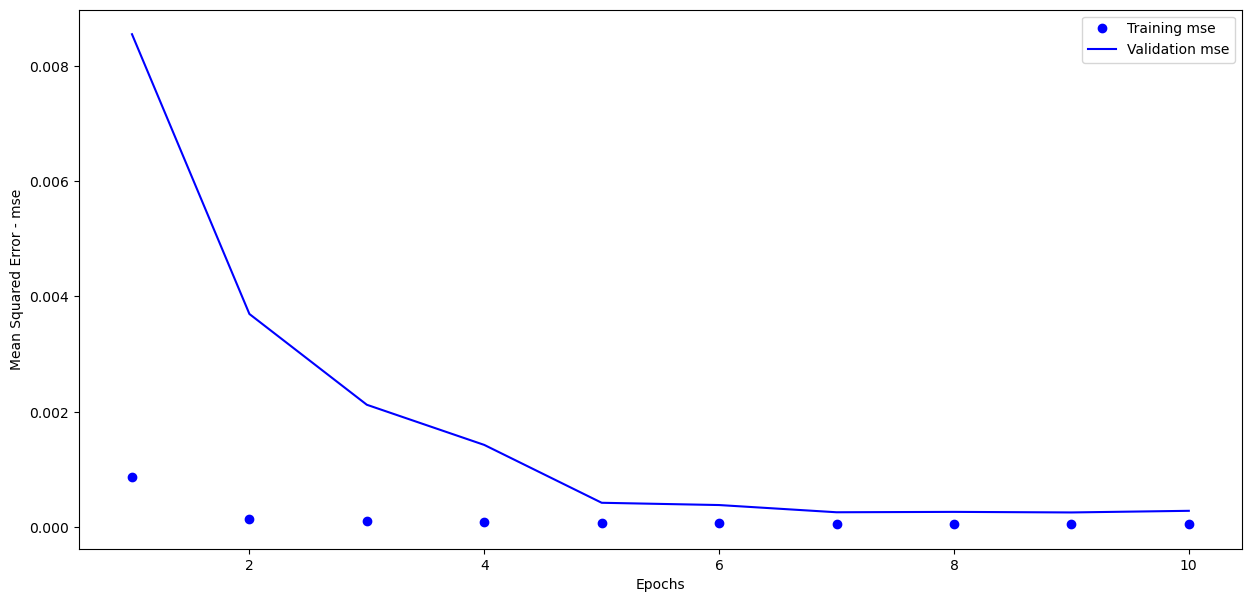

In [15]:
history_dict = history.history

mean_absolute_error_values = history_dict['loss']
val_mean_absolute_error_values = history_dict['val_loss']
epochs = range(1, len(mean_absolute_error_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mean_absolute_error_values, 'bo', label='Training mse')
plt.plot(epochs, val_mean_absolute_error_values, 'b', label='Validation mse')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error - mse')
plt.legend()
plt.show()

In [16]:

pred = model.predict(X_test)
n_rec = random.randint(0, X_test.shape[0] - 1)
predicted_price = pred[n_rec][0] * (data_train[:, 0].max() - data_train[:, 0].min()) + data_train[:, 0].min()
actual_price = y_test[n_rec] * (data_train[:, 0].max() - data_train[:, 0].min()) + data_train[:, 0].min()

259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


In [24]:
print(f"\nPredicted price: {predicted_price:.2f}")
print(f"Actual price: {actual_price:.2f}")
print(f"Absolute Error: {predicted_price - actual_price:.2f}")
print(f"% Error: {(predicted_price - actual_price) / actual_price * 100:.2f}%")


Predicted price: 2453.89
Actual price: 2459.35
Absolute Error: -5.46
% Error: -0.22%
